In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
dfg = pd.read_csv('wat-r1-good.csv')
dfm = pd.read_csv('wat-r1-mal.csv')

In [4]:
dfg

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
0,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,6,1
1,83,4,2,3,0,0,4,16,18,2,0,0,0,2,1,0.500000,9,5,6,1
2,84,4,2,3,1,1,4,16,18,2,0,0,0,2,1,0.500000,10,4,6,1
3,85,4,2,3,2,1,4,16,18,2,0,0,0,2,1,0.500000,11,3,6,1
4,86,4,2,3,3,1,4,16,18,2,0,0,0,2,1,0.500000,12,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,3251158,2,4,4,1,1,2,8,0,0,22,6,10024,3,1,0.333333,15,5,12,1
50097,3251165,2,4,4,2,1,2,8,0,0,22,6,10024,3,1,0.333333,22,4,12,1
50098,3251172,2,4,4,3,1,2,8,0,0,22,6,10024,3,1,0.333333,29,3,12,1
50099,3251179,2,4,4,4,2,2,8,0,0,22,6,10024,3,1,0.333333,36,2,12,1


In [5]:
dfm

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
0,7,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.00,4,7,7,0
1,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,8,6,7,0
2,79,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.00,9,5,7,0
3,80,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.00,10,4,7,0
4,81,0,2,3,2,1,4,16,18,2,1,1,1,1,1,1.00,11,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71836,2022096,4,0,4,1,1,2,10,1,1,28,12,11082,5,0,0.00,11,1,1,0
71837,2022103,4,0,4,2,1,2,10,1,1,28,12,11082,5,0,0.00,18,1,1,0
71838,2022110,4,0,4,3,1,2,10,1,1,28,12,11082,5,0,0.00,25,1,1,0
71839,2022117,4,0,4,4,2,2,10,1,1,28,12,11082,5,0,0.00,32,1,1,0


In [6]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

time              0
outport           0
inport            0
packet_type       0
flit_id           0
flit_type         0
vnet              0
vc                0
src_ni            0
src_router        0
dst_ni            0
dst_router        0
pkt_chuck         0
hop_count         0
current_hop       0
hop_percentage    0
waiting_time      0
pkt_count         0
pkt_max           0
target            0
dtype: int64

In [8]:
df = df.sort_values('time')
df.to_csv('wat-r1-model.csv',index=False)

In [9]:
df = pd.read_csv("wat-r1-model.csv")
df

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
0,7,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.000000,4,7,7,0
1,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,7,0
2,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,6,1
3,79,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.000000,9,5,7,0
4,80,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.000000,10,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,3251158,2,4,4,1,1,2,8,0,0,22,6,10024,3,1,0.333333,15,5,12,1
121938,3251165,2,4,4,2,1,2,8,0,0,22,6,10024,3,1,0.333333,22,4,12,1
121939,3251172,2,4,4,3,1,2,8,0,0,22,6,10024,3,1,0.333333,29,3,12,1
121940,3251179,2,4,4,4,2,2,8,0,0,22,6,10024,3,1,0.333333,36,2,12,1


In [10]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
time,1.000000,0.073879,0.159607,0.020055,0.011723,-0.018399,-0.051942,-0.066694,-0.087413,-0.114742,0.074031,0.073211,0.824835,0.070043,-0.014883,-0.016006,0.043093,-0.150317,-0.200676,0.389502
outport,0.073879,1.000000,-0.171157,-0.202169,-0.000862,0.001354,0.322011,0.353165,-0.108261,-0.262553,-0.220914,0.019252,-0.034422,0.145628,-0.378038,-0.517605,-0.321455,-0.122135,-0.100055,0.217451
inport,0.159607,-0.171157,1.000000,0.008037,-0.015220,0.023905,-0.413283,-0.519151,-0.467346,-0.252382,0.464413,0.368488,-0.004725,0.483866,0.368555,0.435760,0.410964,-0.102964,-0.205400,0.327401
packet_type,0.020055,-0.202169,0.008037,1.000000,0.260563,-0.409233,-0.233214,-0.266011,0.109969,0.032884,0.013854,-0.087901,0.035356,-0.088940,0.097141,0.158695,-0.166409,0.075646,0.019879,-0.010188
flit_id,0.011723,-0.000862,-0.015220,0.260563,1.000000,0.063686,0.155673,0.117454,0.004319,0.001608,-0.049700,-0.022617,0.009426,-0.039891,-0.027415,-0.020030,0.389739,-0.063662,0.012552,0.006536
flit_type,-0.018399,0.001354,0.023905,-0.409233,0.063686,1.000000,-0.244496,-0.184471,-0.006784,-0.002525,0.078058,0.035521,-0.014804,0.062651,0.043057,0.031459,0.489382,-0.064057,0.036032,-0.010265
vnet,-0.051942,0.322011,-0.413283,-0.233214,0.155673,-0.244496,1.000000,0.968480,0.610828,0.366666,-0.850445,-0.463884,-0.037612,-0.277171,0.039630,-0.041159,-0.460507,-0.010017,0.060437,-0.051954
vc,-0.066694,0.353165,-0.519151,-0.266011,0.117454,-0.184471,0.968480,1.000000,0.589522,0.309887,-0.840416,-0.466031,-0.038919,-0.337367,-0.076519,-0.155651,-0.477648,-0.006209,0.084992,-0.078370
src_ni,-0.087413,-0.108261,-0.467346,0.109969,0.004319,-0.006784,0.610828,0.589522,1.000000,0.655230,-0.766468,-0.659911,-0.034296,-0.386319,0.375855,0.365910,-0.298918,0.096626,0.151147,-0.119746
src_router,-0.114742,-0.262553,-0.252382,0.032884,0.001608,-0.002525,0.366666,0.309887,0.655230,1.000000,-0.424242,-0.269277,0.007626,0.139759,0.768263,0.458637,0.014133,0.080274,0.077048,-0.246502


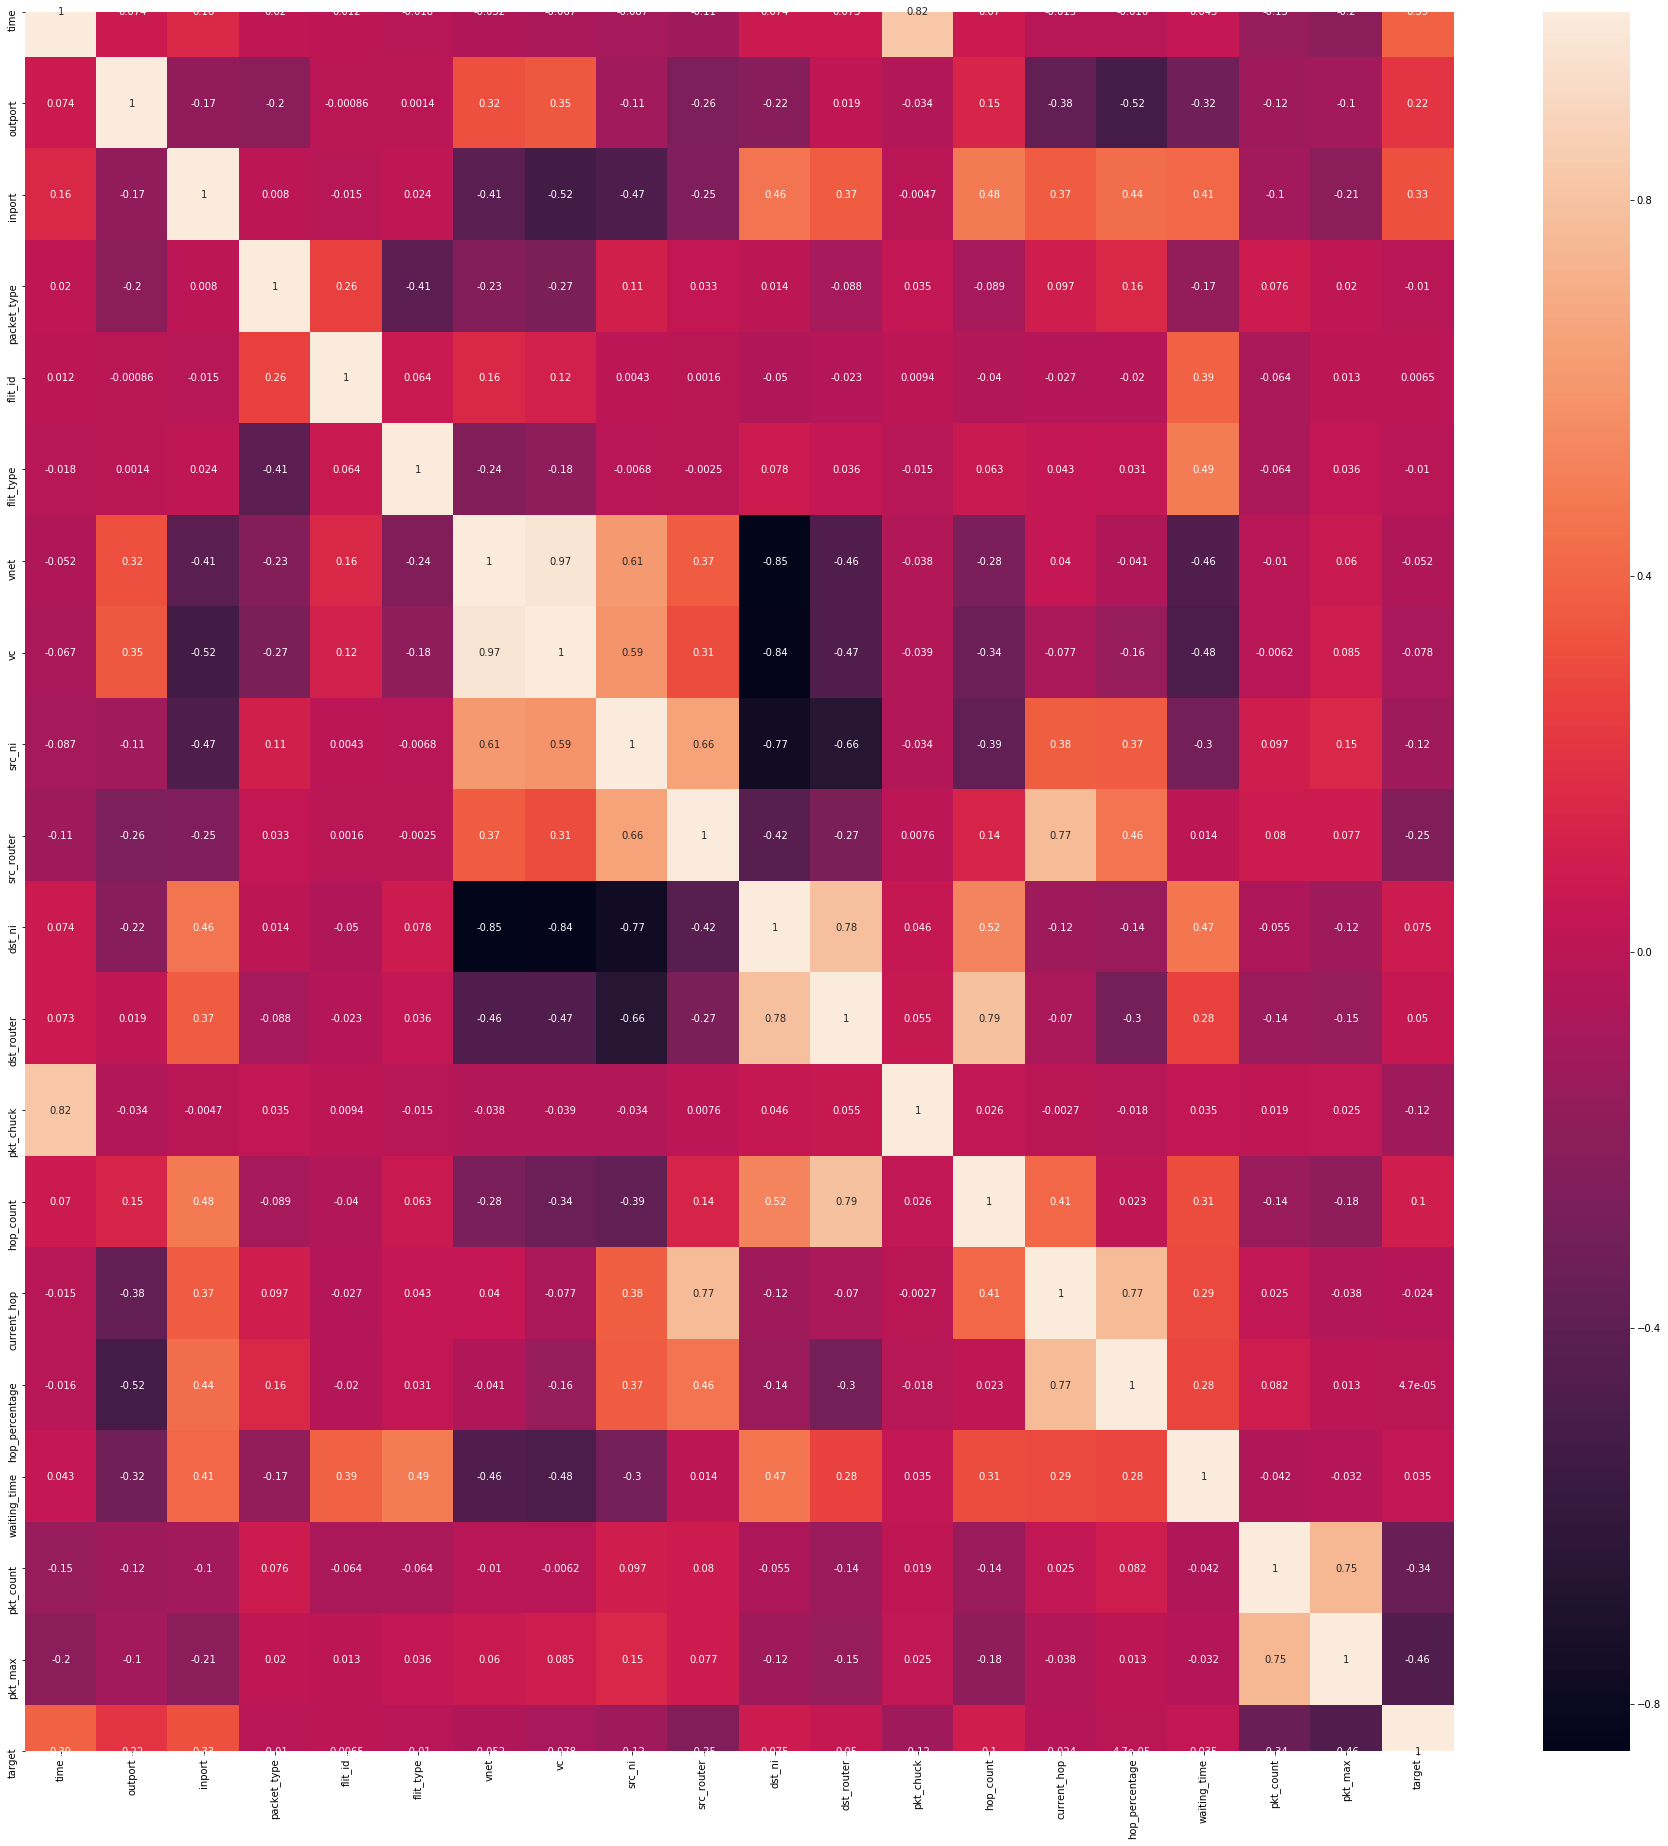

In [11]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
train_X = df.drop(columns=['target','time'])
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max
0,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.000000,4,7,7
1,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,7
2,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,6
3,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.000000,9,5,7
4,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.000000,10,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,2,4,4,1,1,2,8,0,0,22,6,10024,3,1,0.333333,15,5,12
121938,2,4,4,2,1,2,8,0,0,22,6,10024,3,1,0.333333,22,4,12
121939,2,4,4,3,1,2,8,0,0,22,6,10024,3,1,0.333333,29,3,12
121940,2,4,4,4,2,2,8,0,0,22,6,10024,3,1,0.333333,36,2,12


In [13]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.741935,0.466667,0.000090,0.500000,0.0,0.000000,0.000000,0.200000,0.200000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.200000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.166667
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000090,0.166667,0.2,1.000000,0.090909,0.133333,0.200000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000090,0.166667,0.2,1.000000,0.109091,0.100000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.200000,0.133333,0.366667
121938,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.327273,0.100000,0.366667
121939,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.454545,0.066667,0.366667
121940,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.581818,0.033333,0.366667


In [14]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,target
0,1.000000,-0.171157,-0.202169,-0.000862,0.001354,0.322011,0.353165,-0.108261,-0.262553,-0.220914,0.019252,-0.034422,0.145628,-0.378038,-0.517605,-0.321455,-0.122135,-0.100055,0.217451
1,-0.171157,1.000000,0.008037,-0.015220,0.023905,-0.413283,-0.519151,-0.467346,-0.252382,0.464413,0.368488,-0.004725,0.483866,0.368555,0.435760,0.410964,-0.102964,-0.205400,0.327401
2,-0.202169,0.008037,1.000000,0.260563,-0.409233,-0.233214,-0.266011,0.109969,0.032884,0.013854,-0.087901,0.035356,-0.088940,0.097141,0.158695,-0.166409,0.075646,0.019879,-0.010188
3,-0.000862,-0.015220,0.260563,1.000000,0.063686,0.155673,0.117454,0.004319,0.001608,-0.049700,-0.022617,0.009426,-0.039891,-0.027415,-0.020030,0.389739,-0.063662,0.012552,0.006536
4,0.001354,0.023905,-0.409233,0.063686,1.000000,-0.244496,-0.184471,-0.006784,-0.002525,0.078058,0.035521,-0.014804,0.062651,0.043057,0.031459,0.489382,-0.064057,0.036032,-0.010265
5,0.322011,-0.413283,-0.233214,0.155673,-0.244496,1.000000,0.968480,0.610828,0.366666,-0.850445,-0.463884,-0.037612,-0.277171,0.039630,-0.041159,-0.460507,-0.010017,0.060437,-0.051954
6,0.353165,-0.519151,-0.266011,0.117454,-0.184471,0.968480,1.000000,0.589522,0.309887,-0.840416,-0.466031,-0.038919,-0.337367,-0.076519,-0.155651,-0.477648,-0.006209,0.084992,-0.078370
7,-0.108261,-0.467346,0.109969,0.004319,-0.006784,0.610828,0.589522,1.000000,0.655230,-0.766468,-0.659911,-0.034296,-0.386319,0.375855,0.365910,-0.298918,0.096626,0.151147,-0.119746
8,-0.262553,-0.252382,0.032884,0.001608,-0.002525,0.366666,0.309887,0.655230,1.000000,-0.424242,-0.269277,0.007626,0.139759,0.768263,0.458637,0.014133,0.080274,0.077048,-0.246502
9,-0.220914,0.464413,0.013854,-0.049700,0.078058,-0.850445,-0.840416,-0.766468,-0.424242,1.000000,0.784970,0.046047,0.524920,-0.115873,-0.136507,0.471400,-0.055337,-0.119227,0.075179


In [15]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.37528788, -0.71291973,  0.44772591, ..., -0.50405512,
        -0.10260133,  0.02246291],
       [-0.80532603, -0.29421497, -0.28419621, ..., -0.42615442,
        -0.25006331,  0.11930444],
       [-0.80663714, -0.29521692, -0.28936557, ..., -0.42808619,
        -0.24724536,  0.09153142],
       ...,
       [-0.7558658 , -0.11339547, -0.34597397, ...,  0.45459741,
        -0.03088716,  0.16188908],
       [-0.78722128, -0.09568432, -0.39507093, ...,  0.4644139 ,
        -0.02331197,  0.1375618 ],
       [-0.79448407, -0.17593435, -0.2443002 , ...,  0.47788363,
        -0.39584126,  0.08970848]])

In [16]:
pca.explained_variance_ratio_

array([0.35614525, 0.18213494, 0.09870268, 0.08697526, 0.0710063 ,
       0.05223344, 0.04055119, 0.03895065, 0.03174504])

Text(0, 0.5, 'Variance')

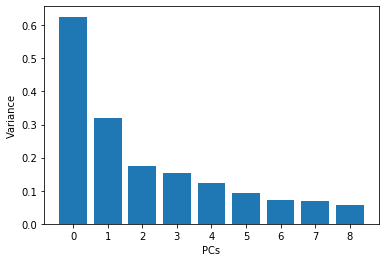

In [17]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [18]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.375288,-0.712920,0.447726,-0.320943,0.701047,0.163467,-0.504055,-0.102601,0.022463
1,-0.805326,-0.294215,-0.284196,-0.487058,0.671608,-0.096548,-0.426154,-0.250063,0.119304
2,-0.806637,-0.295217,-0.289366,-0.488592,0.670773,-0.097767,-0.428086,-0.247245,0.091531
3,0.801544,0.758366,-0.142783,-0.560401,-0.321723,-0.030723,-0.475060,-0.410485,-0.014831
4,0.785373,0.766395,-0.184345,-0.264949,-0.075908,-0.061798,-0.465589,-0.394957,-0.040441
...,...,...,...,...,...,...,...,...,...
121937,-0.741071,-0.142835,-0.206031,-0.221765,-0.208690,-0.064514,0.466480,-0.037083,0.184341
121938,-0.748468,-0.128115,-0.276002,0.036811,-0.215015,-0.067499,0.460539,-0.033985,0.173115
121939,-0.755866,-0.113395,-0.345974,0.295387,-0.221339,-0.070484,0.454597,-0.030887,0.161889
121940,-0.787221,-0.095684,-0.395071,0.618325,0.048555,-0.095422,0.464414,-0.023312,0.137562


In [19]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.375288,-0.712920,0.447726,-0.320943,0.701047,0.163467,-0.504055,-0.102601,0.022463,0
1,-0.805326,-0.294215,-0.284196,-0.487058,0.671608,-0.096548,-0.426154,-0.250063,0.119304,0
2,-0.806637,-0.295217,-0.289366,-0.488592,0.670773,-0.097767,-0.428086,-0.247245,0.091531,1
3,0.801544,0.758366,-0.142783,-0.560401,-0.321723,-0.030723,-0.475060,-0.410485,-0.014831,0
4,0.785373,0.766395,-0.184345,-0.264949,-0.075908,-0.061798,-0.465589,-0.394957,-0.040441,0
...,...,...,...,...,...,...,...,...,...,...
121937,-0.741071,-0.142835,-0.206031,-0.221765,-0.208690,-0.064514,0.466480,-0.037083,0.184341,1
121938,-0.748468,-0.128115,-0.276002,0.036811,-0.215015,-0.067499,0.460539,-0.033985,0.173115,1
121939,-0.755866,-0.113395,-0.345974,0.295387,-0.221339,-0.070484,0.454597,-0.030887,0.161889,1
121940,-0.787221,-0.095684,-0.395071,0.618325,0.048555,-0.095422,0.464414,-0.023312,0.137562,1


In [20]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,1.325980e-15,2.994518e-16,3.567483e-16,-1.098377e-15,1.283964e-16,-6.235362e-16,-1.419496e-15,-2.318336e-16,-0.126173
1,1.325980e-15,1.000000e+00,-1.850367e-15,-4.548482e-16,4.532550e-16,9.653487e-16,2.024294e-16,2.341923e-15,1.093982e-15,-0.074500
2,2.994518e-16,-1.850367e-15,1.000000e+00,1.970652e-16,3.768333e-16,-1.507310e-15,7.614718e-16,1.286399e-15,1.523072e-16,-0.332221
3,3.567483e-16,-4.548482e-16,1.970652e-16,1.000000e+00,7.411383e-16,-8.246188e-16,3.651636e-16,8.095428e-16,2.897478e-17,-0.079739
4,-1.098377e-15,4.532550e-16,3.768333e-16,7.411383e-16,1.000000e+00,-4.046807e-15,-8.755422e-16,-5.462995e-16,-4.545914e-16,-0.011480
5,1.283964e-16,9.653487e-16,-1.507310e-15,-8.246188e-16,-4.046807e-15,1.000000e+00,2.198329e-16,1.054206e-15,7.093569e-16,-0.297695
6,-6.235362e-16,2.024294e-16,7.614718e-16,3.651636e-16,-8.755422e-16,2.198329e-16,1.000000e+00,-9.881165e-16,-3.026827e-16,-0.065037
7,-1.419496e-15,2.341923e-15,1.286399e-15,8.095428e-16,-5.462995e-16,1.054206e-15,-9.881165e-16,1.000000e+00,-9.231231e-16,0.064389
8,-2.318336e-16,1.093982e-15,1.523072e-16,2.897478e-17,-4.545914e-16,7.093569e-16,-3.026827e-16,-9.231231e-16,1.000000e+00,-0.326012
target,-1.261732e-01,-7.449964e-02,-3.322212e-01,-7.973894e-02,-1.148048e-02,-2.976948e-01,-6.503704e-02,6.438911e-02,-3.260125e-01,1.000000


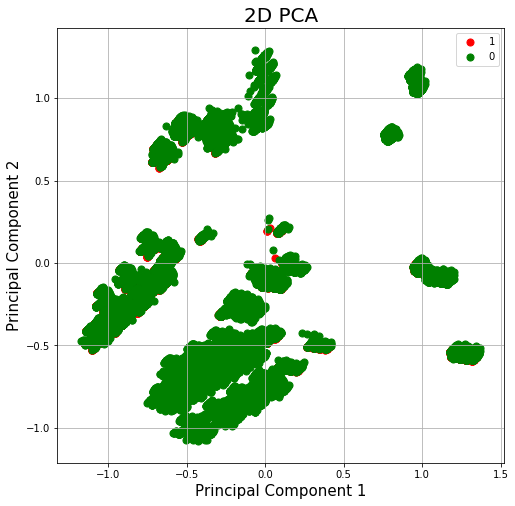

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
train_Y = df['target']

In [23]:
train_Y.value_counts()

0    71841
1    50101
Name: target, dtype: int64

In [24]:
seed = 7
np.random.seed(seed)

#### machine learning models

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [28]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.417289
         Iterations 10
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.384      
Dependent Variable: target           AIC:              101805.9974
Date:               2020-05-04 17:05 BIC:              101980.8008
No. Observations:   121942           Log-Likelihood:   -50885.    
Df Model:           17               LL-Null:          -82575.    
Df Residuals:       121924           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
--------------------------------------------------------------------
0        2.6556     0.0498    53.3226   0.0000     2.5580     2.7532
1        0.9402     0.1205     7.8002   0.00

In [30]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.81
Train Prediction Score 81.09623733719248
Test Prediction  81.20291117830966


In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18823  4225]
 [ 3110 12864]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     23048
           1       0.75      0.81      0.78     15974

    accuracy                           0.81     39022
   macro avg       0.81      0.81      0.81     39022
weighted avg       0.82      0.81      0.81     39022



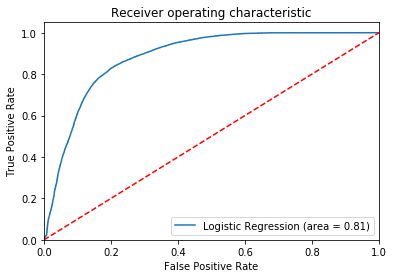

In [34]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
y_pred_knn= knn.predict(X_test)

In [37]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.7332368547998
Test Prediction  86.83563118240993


In [38]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[19685  3363]
 [ 1774 14200]]


In [39]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     23048
           1       0.81      0.89      0.85     15974

    accuracy                           0.87     39022
   macro avg       0.86      0.87      0.87     39022
weighted avg       0.87      0.87      0.87     39022



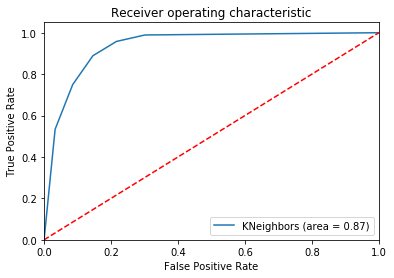

In [40]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [41]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [42]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred_nb= nb.predict(X_test)

In [44]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 69.05451037144236
Test Prediction Score 69.15073548254831


In [45]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[14070  8978]
 [ 3060 12914]]


In [46]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70     23048
           1       0.59      0.81      0.68     15974

    accuracy                           0.69     39022
   macro avg       0.71      0.71      0.69     39022
weighted avg       0.73      0.69      0.69     39022



In [47]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD

Using TensorFlow backend.


In [48]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 10s 145us/step - loss: 0.5470 - accuracy: 0.7203 - val_loss: 0.4570 - val_accuracy: 0.7922
Epoch 2/10
66336/66336 [==============================] - 6s 87us/step - loss: 0.4474 - accuracy: 0.7982 - val_loss: 0.4384 - val_accuracy: 0.8056
Epoch 3/10
66336/66336 [==============================] - 6s 86us/step - loss: 0.4345 - accuracy: 0.8066 - val_loss: 0.4289 - val_accuracy: 0.8071
Epoch 4/10
66336/66336 [==============================] - 7s 99us/step - loss: 0.4281 - accuracy: 0.8092 - val_loss: 0.4246 - val_accuracy: 0.8105
Epoch 5/10
66336/66336 [==============================] - 6s 87us/step - loss: 0.4250 - accuracy: 0.8112 - val_loss: 0.4225 - val_accuracy: 0.8072
Epoch 6/10
66336/66336 [==============================] - 6s 86us/step - loss: 0.4234 - accuracy: 0.8104 - val_loss: 0.4211 - val_accuracy: 0.8109
Epoch 7/10
66336/66336 [==============================] - 7s 100us

In [49]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.24%


In [50]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 6s 92us/step - loss: 0.2415 - accuracy: 0.5843 - val_loss: 0.2318 - val_accuracy: 0.5981
Epoch 2/10
66336/66336 [==============================] - 5s 70us/step - loss: 0.2125 - accuracy: 0.7104 - val_loss: 0.1890 - val_accuracy: 0.7749
Epoch 3/10
66336/66336 [==============================] - 6s 92us/step - loss: 0.1721 - accuracy: 0.7789 - val_loss: 0.1588 - val_accuracy: 0.7833
Epoch 4/10
66336/66336 [==============================] - 6s 88us/step - loss: 0.1524 - accuracy: 0.7950 - val_loss: 0.1472 - val_accuracy: 0.8019
Epoch 5/10
66336/66336 [==============================] - 5s 79us/step - loss: 0.1451 - accuracy: 0.8056 - val_loss: 0.1430 - val_accuracy: 0.8096
Epoch 6/10
66336/66336 [==============================] - 5s 80us/step - loss: 0.1421 - accuracy: 0.8078 - val_loss: 0.1409 - val_accuracy: 0.8087
Epoch 7/10
66336/66336 [==============================] - 6s 96us/st

In [51]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.48%


In [52]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 7s 107us/step - loss: 0.2415 - accuracy: 0.5885 - val_loss: 0.2346 - val_accuracy: 0.5982
Epoch 2/10
66336/66336 [==============================] - 9s 133us/step - loss: 0.2116 - accuracy: 0.6887 - val_loss: 0.1931 - val_accuracy: 0.7201
Epoch 3/10
66336/66336 [==============================] - 9s 135us/step - loss: 0.1716 - accuracy: 0.7522 - val_loss: 0.1527 - val_accuracy: 0.8022
Epoch 4/10
66336/66336 [==============================] - 8s 117us/step - loss: 0.1440 - accuracy: 0.8059 - val_loss: 0.1390 - val_accuracy: 0.8107
Epoch 5/10
66336/66336 [==============================] - 8s 120us/step - loss: 0.1370 - accuracy: 0.8115 - val_loss: 0.1353 - val_accuracy: 0.8113
Epoch 6/10
66336/66336 [==============================] - 5s 80us/step - loss: 0.1342 - accuracy: 0.8135 - val_loss: 0.1328 - val_accuracy: 0.8134
Epoch 7/10
66336/66336 [==============================] - 6s 85

In [53]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.83%


In [54]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 66336 samples, validate on 16584 samples
Epoch 1/30
66336/66336 [==============================] - 12s 185us/step - loss: 0.1402 - accuracy: 0.7980 - val_loss: 0.1238 - val_accuracy: 0.8180
Epoch 2/30
66336/66336 [==============================] - 11s 166us/step - loss: 0.1246 - accuracy: 0.8180 - val_loss: 0.1157 - val_accuracy: 0.8251
Epoch 3/30
66336/66336 [==============================] - 10s 150us/step - loss: 0.1186 - accuracy: 0.8234 - val_loss: 0.1118 - val_accuracy: 0.8330
Epoch 4/30
66336/66336 [==============================] - 11s 170us/step - loss: 0.1155 - accuracy: 0.8282 - val_loss: 0.1104 - val_accuracy: 0.8324
Epoch 5/30
66336/66336 [==============================] - 11s 159us/step - loss: 0.1135 - accuracy: 0.8319 - val_loss: 0.1063 - val_accuracy: 0.8386
Epoch 6/30
66336/66336 [==============================] - 10s 149us/step - loss: 0.1122 - accuracy: 0.8352 - val_loss: 0.1092 - val_accuracy: 0.8363
Epoch 7/30
66336/66336 [==============================] 

In [55]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.96%


In [56]:
principal_df[principal_df.duplicated()].shape

(167, 9)

In [57]:
train_X[train_X.duplicated()].shape

(167, 18)

In [58]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
# GridSearchCV
param_grid={'max_depth':range(0,15,2) ,
            'max_features':range(0,15,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 14, 'max_features': 14}
Accuracy : 0.9061263868789193


In [60]:
dt = DecisionTreeClassifier(max_depth=14,max_features=14,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [61]:
y_pred_dt= dt.predict(X_test)

In [62]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.53256150506513
Test Prediction Score 91.08707908359386


In [63]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[20455  2593]
 [  885 15089]]


In [64]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     23048
           1       0.85      0.94      0.90     15974

    accuracy                           0.91     39022
   macro avg       0.91      0.92      0.91     39022
weighted avg       0.92      0.91      0.91     39022



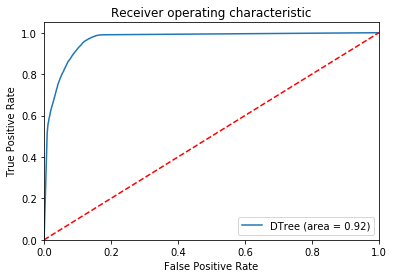

In [65]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [99]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,15,2),
            'n_estimators':[125,250],
            'max_features':range(0,15,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [ ]:
rf = RandomForestClassifier(max_depth=7,max_features=11,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

In [ ]:
y_pred_rf= dt.predict(X_test)

In [ ]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_rf))

In [ ]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [65]:
#xgboost
from xgboost import XGBClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,15,2),
            'n_estimators':[125,250],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [91]:
xgbc = XGBClassifier(max_depth=4,min_child_weight=1,n_estimators=250,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
y_pred_xgbc= dt.predict(X_test)

In [95]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.73350416399744


In [96]:
cm = confusion_matrix(y_test, y_pred_xgbc)
print(cm)

[[23015    40]
 [   64 15906]]


In [97]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23055
           1       1.00      1.00      1.00     15970

    accuracy                           1.00     39025
   macro avg       1.00      1.00      1.00     39025
weighted avg       1.00      1.00      1.00     39025



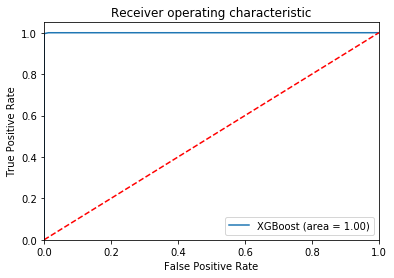

In [98]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [ ]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [ ]:
kscv_roc_auc = roc_auc_score(y_test, y_pred_ksvc)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KSVC (area = %0.2f)' % kscv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()